In [4]:
import datetime
import numpy as np
from influxdb import InfluxDBClient

# import plotting related libraries
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import numpy as np
from matplotlib import colors
import matplotlib
import matplotlib.patches as mpatches

7.4

In [6]:
# Data Preparation
avg_2hr_err_plot = [0.36743839, 0.24621109, 0.06165547, 0.04113952, 0.06588765]
avg_4hr_err_plot = [0.43007837, 0.32623196, 0.08663453, 0.05752873, 0.04218574]
avg_8hr_err_plot = [0.57808441, 0.47209643, 0.1149862,  0.06347418, 0.05042935]
avg_24hr_err_plot = [0.58515917, 0.60909722, 0.55608618, 0.40550324, 0.29674945]

transaction_avg_12am = [[  2999.33333333,  13057.08333333,  76701, 150857.5,
  302827.08333333],
 [  1745,  7630.16666667,  40598.33333333, 76249.75,
  155634.16666667],
  [7.05500000e+02, 2.72366667e+03, 1.94405833e+04, 3.70848333e+04,
  7.48070000e+04],
 [  162.4,  541.9, 4652.4,  9190.8,
  18622.2 ]]

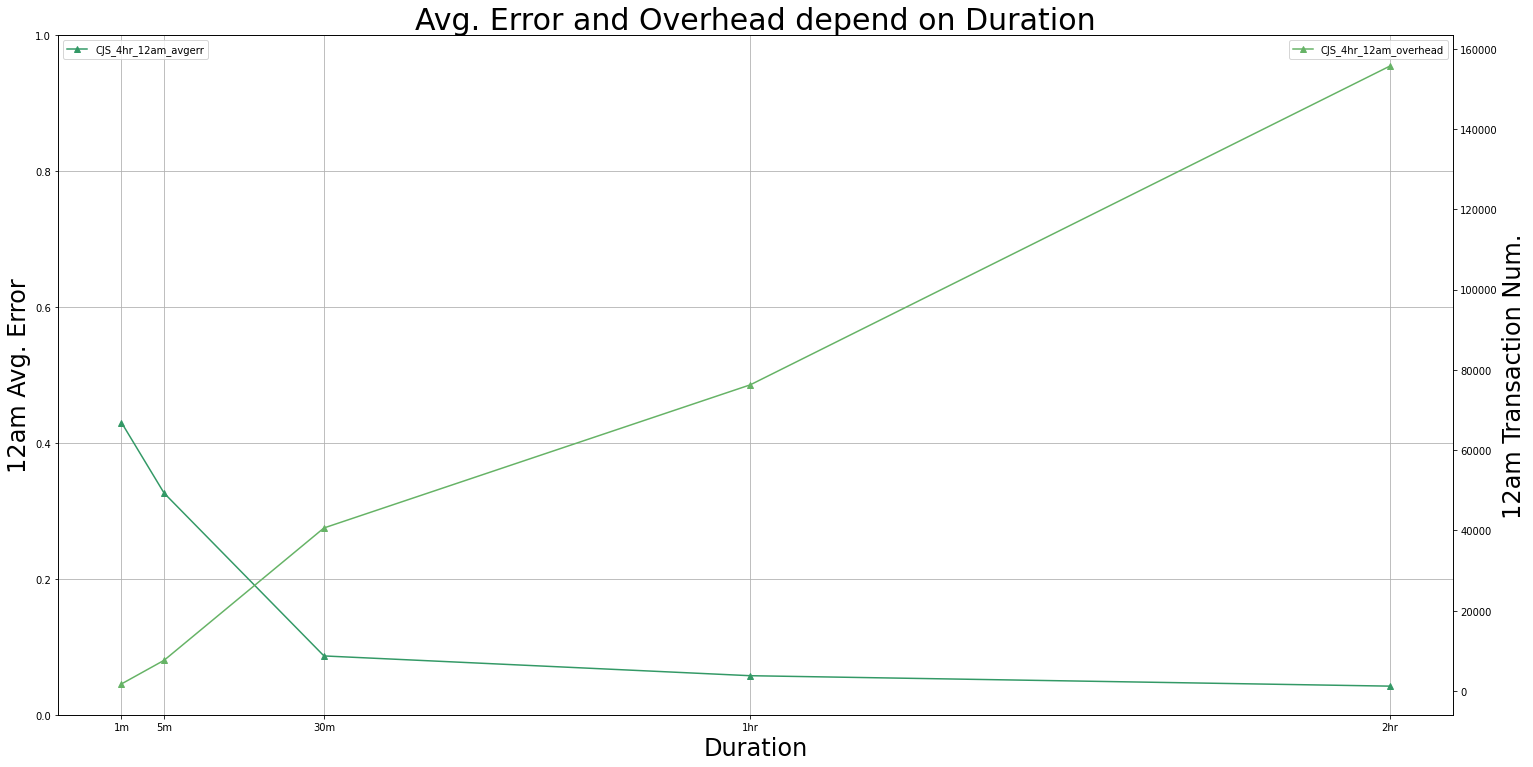

In [7]:
fig = plt.figure(figsize=(25, 12.5))
ax1 = plt.axes()

# fig, ax1 = plt.subplots()
color_idx = np.linspace(0, 1, 6) 
x_axis = [1, 5, 20, 60, 120]

# Comments out for different Capturing Interval

# ax.plot3D(new_x_axis, avg_2hr_err_plot, zs = 2, zdir='y', c=plt.cm.summer(color_idx[0]), label='CJS_2hr_12am', marker='o', linestyle='-')
ax1.plot(x_axis, avg_4hr_err_plot, c=plt.cm.summer(color_idx[1]), label='CJS_4hr_12am_avgerr', marker='^', linestyle='-')
# ax.plot3D(new_x_axis, avg_8hr_err_plot, zs = 8, zdir='y', c=plt.cm.summer(color_idx[2]), label='CJS_8hr_12am', marker='*', linestyle='-')
# ax.plot3D(new_x_axis, avg_24hr_err_plot, zs = 24, zdir='y', c=plt.cm.summer(color_idx[3]), label='CJS_24hr_12am', marker='X', linestyle='-')

ax2 = ax1.twinx()

# ax.plot3D(x_axis, transaction_avg_12am[0], zs = 2, zdir='y', c=plt.cm.summer(color_idx[0]), label='CJS_2hr_12am', marker='o', linestyle='-')
ax2.plot(x_axis, transaction_avg_12am[1], c=plt.cm.summer(color_idx[2]), label='CJS_4hr_12am_overhead', marker='^', linestyle='-')
# ax.plot3D(x_axis, transaction_avg_12am[2], zs = 8, zdir='y', c=plt.cm.summer(color_idx[2]), label='CJS_8hr_12am', marker='*', linestyle='-')
# ax.plot3D(x_axis, transaction_avg_12am[3], zs = 24, zdir='y', c=plt.cm.summer(color_idx[3]), label='CJS_24hr_12am', marker='X', linestyle='-')

ax1.legend(loc="upper left")
ax2.legend(loc="upper right")
ax1.set_xlabel('Duration', fontsize=24)
ax1.set_xticks([1, 5, 20, 60, 120])
label_x = ['1m', '5m', '30m', '1hr', '2hr']
ax1.set_xticklabels(label_x)
ax1.set_ylabel('12am Avg. Error', fontsize=24)
ax1.set_ylim(0, 1)
ax2.set_ylabel('12am Transaction Num.', fontsize=24)

ax1.grid(True)
plt.savefig('12am Avg. Error x Transaction Number.png')
plt.title("Avg. Error and Overhead depend on Duration", size=30)
plt.show()

7.5

In [7]:
#(no loss) avg err 0.07250395067041507
estimate_N_24hr_12pm_1hr = [0., 126., 126., 126., 126.95861592, 126.15740741, 126., 126., 126., 128.0814256, 126., 126., 116.97752809, 104.]

#(loss in 11/2) avg err 0.0734081752074521
estimate_N_24hr_12pm_1hr_1day = [0., 126., 126., 126., 126.95861592, 125., 126., 126., 126., 128.0814256, 126., 126., 116.97752809, 104.]

#(loss in 11/2-3) avg err 0.07406000639833253
estimate_N_24hr_12pm_1hr_2days  = [0., 126., 126., 126., 126.95861592, 125., 125., 126.00806452, 126., 128.0814256, 126., 126., 116.97752809, 104.]

#(loss in 11/2-4) avg err 0.07480633524168402
estimate_N_24hr_12pm_1hr_3days = [0., 126., 126., 126., 126.95861592, 125., 125., 125., 126.01626016, 128.0814256, 126., 126., 116.97752809, 104.]

#(loss in 11/2-5) avg err 0.07552110235826484
estimate_N_24hr_12pm_1hr_4days =  [0., 126., 126., 126., 126.95861592, 125., 125., 125., 125., 128.09834776, 126., 126., 116.97752809, 104.]

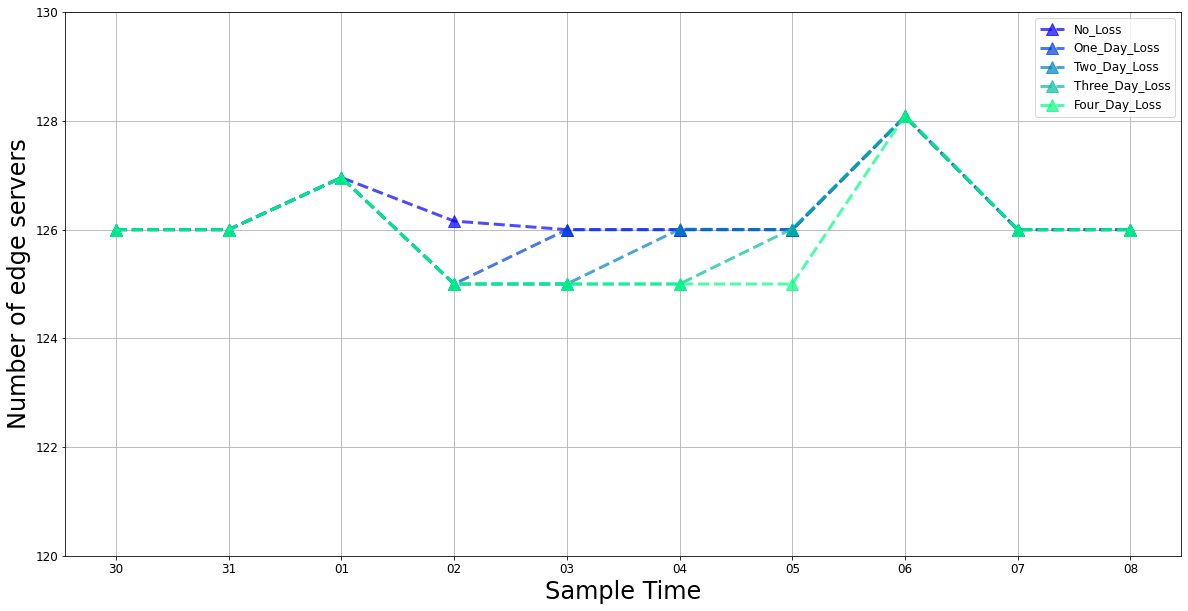

In [8]:
#CJS 24hr
fig, ax = plt.subplots(figsize=(20, 10))
x_axis = ['30', '31', '01', '02', '03', '04', '05', '06', '07', '08']
color_idx = np.linspace(0, 1, 5)
ax.set_xlabel('Sample Time', fontsize=24)
ax.set_ylabel('Number of edge servers', fontsize=24)
ax.set_ylim(bottom = 120, top = 130)
# plt.plot(x_axis, BS_24hr_12am[2:-2], "o--", markersize=12, linewidth=3, color=plt.cm.winter(color_idx[0]), label='BS_24hr_12am', alpha=0.7)


plt.plot(x_axis, estimate_N_24hr_12pm_1hr[2:-2], "^--", markersize=12, linewidth=3, color=plt.cm.winter(color_idx[0]), label='No_Loss', alpha=0.7)
plt.plot(x_axis, estimate_N_24hr_12pm_1hr_1day[2:-2], "^--", markersize=12, linewidth=3, color=plt.cm.winter(color_idx[1]), label='One_Day_Loss', alpha=0.7)
plt.plot(x_axis, estimate_N_24hr_12pm_1hr_2days[2:-2], "^--", markersize=12, linewidth=3, color=plt.cm.winter(color_idx[2]), label='Two_Day_Loss', alpha=0.7)
plt.plot(x_axis, estimate_N_24hr_12pm_1hr_3days[2:-2], "^--", markersize=12, linewidth=3, color=plt.cm.winter(color_idx[3]), label='Three_Day_Loss', alpha=0.7)
plt.plot(x_axis, estimate_N_24hr_12pm_1hr_4days[2:-2], "^--", markersize=12, linewidth=3, color=plt.cm.winter(color_idx[4]), label='Four_Day_Loss', alpha=0.7)


ax.grid()
leg = ax.legend(fontsize=12)
# leg.set_title('Sampling Duration',prop={'size':20})

ax.tick_params(axis='both', which='major', labelsize=12)

plt.show()

7.6

In [11]:
BS_24hr_12am_us_1day = [131, 135, 131, 132, 141, 128, 152, 133, 140, 152, 128, 130, 131, 129]
estimate_N_24hr_12pm_1hr_us = [0., 126., 126., 126., 126.95861592, 126.15740741, 126., 126., 126., 128.0814256, 126., 126., 116.97752809, 104.]
BS_24hr_12am_eu_1day = [546, 574, 566, 544, 566, 589, 680, 607, 653, 584, 599, 601, 534, 695]
estimate_N_4hr_1am_1hr_eu = [0., 817.6, 280.94904459, 498.61132075, 496.13445378, 494., 494., 497.81467181, 526.29007634, 512., 512., 512., 512., 528.4497992, 521.68831169, 550.58359621, 539., 593.14611872, 564.95070423, 631.26051786, 588., 588., 588., 588., 588., 589.93421053, 606.32352941, 597.01013514, 596., 596., 596., 603.71521036, 600., 628.8, 612., 612., 616.27972028, 614., 616.17730496, 615., 615., 639.27173913, 594., 605.6029683, 593., 593.50890585, 592., 592., 592., 675.0362379, 621., 621., 621., 622.52439024, 620., 620., 689.52601918, 614., 614., 614., 614., 665.6144364, 625., 659.26109661, 544., 544., 544., 644.32732816, 570., 570.99300699, 569., 569., 569., 623.81671299, 565.24210526, 665.95360825, 481.27488152, 480.30288462, 478., 546.40388009, 452.84347826, 697.46690744, 210.05405405, 170.]

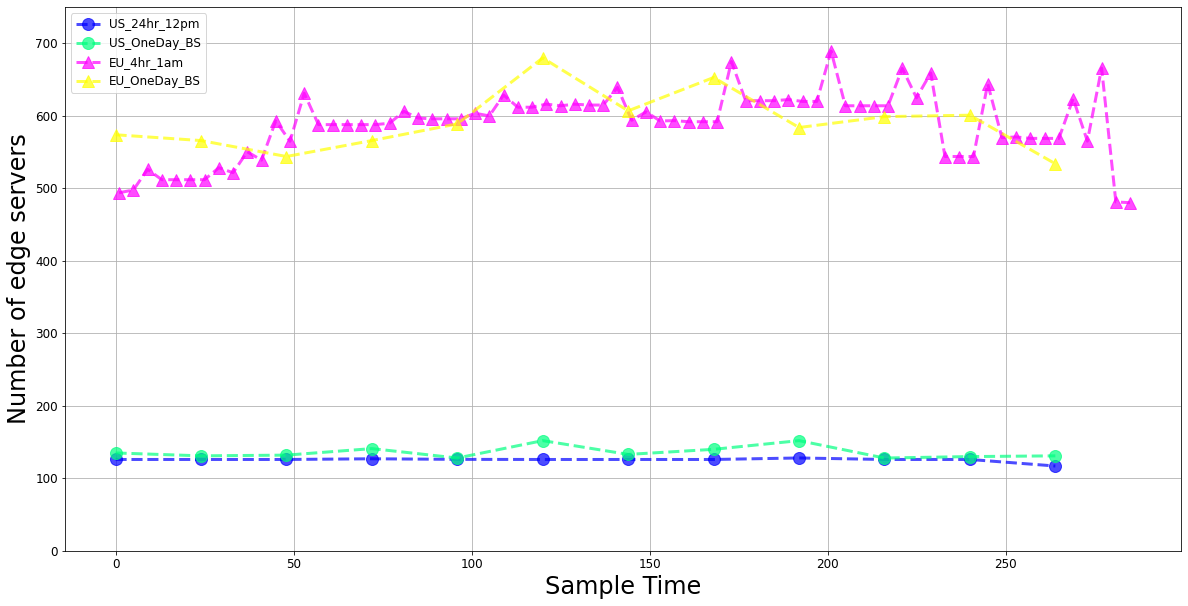

In [12]:
#CJS 8hr
fig, ax = plt.subplots(figsize=(20, 10))
x_axis = [24*d for d in range(12)]
x_axis1 = [4*d+1 for d in range(12*6)]
color_idx = np.linspace(0, 1, 2)
ax.set_xlabel('Sample Time', fontsize=24)
ax.set_ylabel('Number of edge servers', fontsize=24)

plt.plot(x_axis, estimate_N_24hr_12pm_1hr_us[1:-1], "o--", markersize=12, linewidth=3, color=plt.cm.winter(color_idx[0]), label='US_24hr_12pm', alpha=0.7)
plt.plot(x_axis, BS_24hr_12am_us_1day[1:-1], "o--", markersize=12, linewidth=3, color=plt.cm.winter(color_idx[1]), label='US_OneDay_BS', alpha=0.7)
ax.set_ylim(bottom=0, top=750)

plt.plot(x_axis1, estimate_N_4hr_1am_1hr_eu[6:-6], "^--", markersize=12, linewidth=3, color=plt.cm.spring(color_idx[0]), label='EU_4hr_1am', alpha=0.7)
plt.plot(x_axis, BS_24hr_12am_eu_1day[1:-1], "^--", markersize=12, linewidth=3, color=plt.cm.spring(color_idx[1]), label='EU_OneDay_BS', alpha=0.7)

ax.grid()
leg = ax.legend(fontsize=12)
# leg.set_title('Sampling Duration',prop={'size':20})

ax.tick_params(axis='both', which='major', labelsize=12)

plt.show()